In [62]:
import pandas as pd
import numpy as np
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import random

from lda_model import simple_cleaner

In [2]:
df1a = pd.read_csv('arxiv_datasets/cs.AI_1.csv')
df1b = pd.read_csv('arxiv_datasets/cs.AI_2.csv')
df2 = pd.read_csv('arxiv_datasets/cs.CC.csv')
df3 = pd.read_csv('arxiv_datasets/cs.CE.csv')
df4 = pd.read_csv('arxiv_datasets/cs.CG.csv')
df5 = pd.read_csv('arxiv_datasets/cs.CL.csv')
df6a = pd.read_csv('arxiv_datasets/cs.CV_1.csv')
df6b = pd.read_csv('arxiv_datasets/cs.CV_2.csv')
df7 = pd.read_csv('arxiv_datasets/cs.CY.csv')
df8 = pd.read_csv('arxiv_datasets/cs.DB.csv')
df9 = pd.read_csv('arxiv_datasets/cs.DC.csv')
df10 = pd.read_csv('arxiv_datasets/cs.DL.csv')
df11 = pd.read_csv('arxiv_datasets/cs.DS.csv')
df12 = pd.read_csv('arxiv_datasets/cs.ET.csv')
df13 = pd.read_csv('arxiv_datasets/cs.FL.csv')
df14 = pd.read_csv('arxiv_datasets/cs.GL.csv')
df15 = pd.read_csv('arxiv_datasets/cs.GR.csv')
df16 = pd.read_csv('arxiv_datasets/cs.GT.csv')
df17 = pd.read_csv('arxiv_datasets/cs.AR.csv')
df18 = pd.read_csv('arxiv_datasets/cs.HC.csv')
df19 = pd.read_csv('arxiv_datasets/cs.IR.csv')
df20 = pd.read_csv('arxiv_datasets/cs.IT.csv')
df21 = pd.read_csv('arxiv_datasets/cs.LO.csv')
df22a = pd.read_csv('arxiv_datasets/cs.LG_1.csv')
df22b = pd.read_csv('arxiv_datasets/cs.LG_2.csv')
df22c = pd.read_csv('arxiv_datasets/cs.LG_3.csv')
df23 = pd.read_csv('arxiv_datasets/cs.MA.csv')
df24 = pd.read_csv('arxiv_datasets/cs.MS.csv')
df25 = pd.read_csv('arxiv_datasets/cs.NI.csv')
df26 = pd.read_csv('arxiv_datasets/cs.NE.csv')
df27 = pd.read_csv('arxiv_datasets/cs.NA.csv')
df28 = pd.read_csv('arxiv_datasets/cs.OS.csv')
df29 = pd.read_csv('arxiv_datasets/cs.PF.csv')
df30 = pd.read_csv('arxiv_datasets/cs.PL.csv')
df31 = pd.read_csv('arxiv_datasets/cs.RO.csv')
df32 = pd.read_csv('arxiv_datasets/cs.SI.csv')
df33 = pd.read_csv('arxiv_datasets/cs.SD.csv')
df34 = pd.read_csv('arxiv_datasets/cs.SE.csv')
df35 = pd.read_csv('arxiv_datasets/cs.SC.csv')
df36 = pd.read_csv('arxiv_datasets/cs.SY.csv')
df37 = pd.read_csv('arxiv_datasets/cs.CR.csv')
df38 = pd.read_csv('arxiv_datasets/cs.DM.csv')

In [3]:
df = pd.concat([df1a,df1b,df2,df3,df4,df5,df6a,df6b,df7,df8,df9,df10,
                df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,
                df21,df22a,df22b,df22c,df23,df24,df25,df26,df27,df28,df29,df30,
                df31,df32,df33,df34,df35,df36,df37,df38]).reset_index(drop=True)

In [4]:
df = df.drop_duplicates().reset_index(drop=True)[['Title','Published','Summary']]
df.shape

(582340, 3)

In [5]:
start_time = time.time()
df['cleaned_text'] = df['Summary'].apply(simple_cleaner)
print(time.time()-start_time)

247.89501237869263


In [6]:
df.head(2)

,Title,Published,Summary,cleaned_text
0,Domain-Independent Dynamic Programming,2024-01-25T01:48:09Z,"For combinatorial optimization problems, mod...",combinatorial optimization problem modelbased ...
1,Agent-based Simulation with Netlogo to Evaluat...,2024-01-25T13:05:06Z,In this paper an agent-based simulation is d...,paper agentbased simulation developed order ev...


In [7]:
from collections import Counter

In [8]:
df['pub_date'] = pd.to_datetime(df['Published']).dt.date

date_df = pd.DataFrame(df.groupby('pub_date')['cleaned_text'].sum()).reset_index()
date_df['number_of_papers'] = [num for num in df.groupby('pub_date')['cleaned_text'].count()]

print(time.time()-start_time)

date_df

255.40200114250183


,pub_date,cleaned_text,number_of_papers
0,2012-09-12,backpropagation algorithm one widely used popu...,18
1,2012-09-13,theory random real number exceedingly welldeve...,12
2,2012-09-14,automatic text summarization preprocessing imp...,32
3,2012-09-15,several variant constraint satisfaction proble...,21
4,2012-09-16,present framework largescale distributed escie...,10
...,...,...,...
4107,2024-01-27,diffusion planning recognized effective decisi...,181
4108,2024-01-28,predicting next activity ongoing process one c...,187
4109,2024-01-29,answering complex logical query incomplete kno...,501
4110,2024-01-30,difficulty one key driver player engagement of...,507


In [9]:
date_df['cleaned_text'].str.split().apply(Counter)
print(time.time()-start_time)

268.63401436805725


In [10]:
date_df['number_of_tokens'] = date_df['cleaned_text'].str.split().apply(len)
print(time.time()-start_time)

274.00800800323486


C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

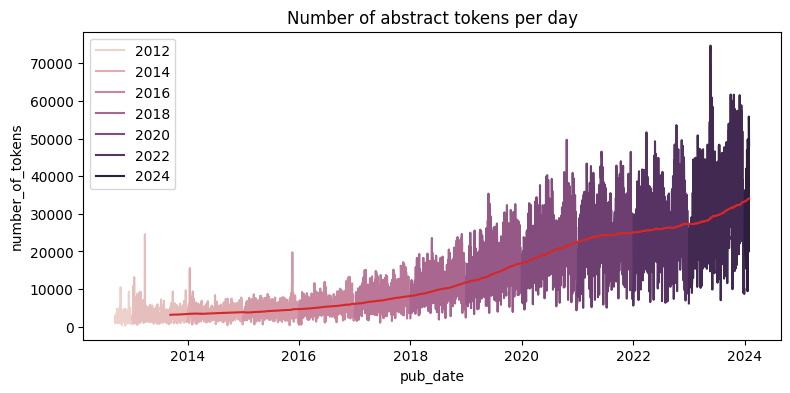

In [11]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['number_of_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['number_of_tokens'].rolling(360).mean(), x=date_df['pub_date'])
plt.title('Number of abstract tokens per day');

In [12]:
date_df['unique_tokens'] = date_df['cleaned_text'].str.split().apply(set).apply(len)
print(time.time()-start_time)

286.2939553260803


C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

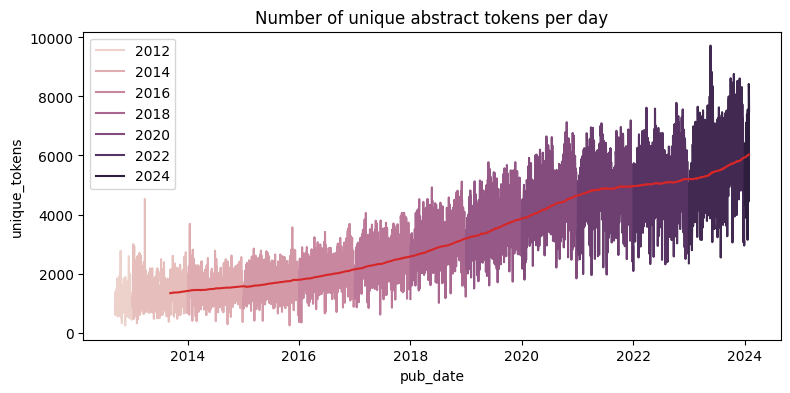

In [13]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['unique_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['unique_tokens'].rolling(360).mean(), x=date_df['pub_date'])
plt.title('Number of unique abstract tokens per day');

C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\trevor.sauerbrey\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

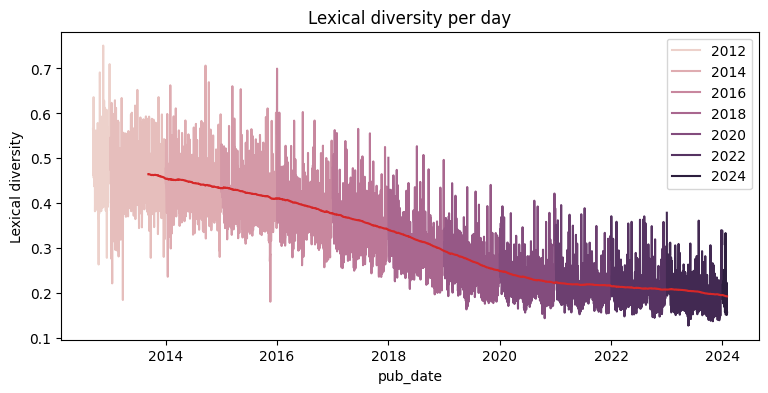

In [14]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['unique_tokens'] / date_df['number_of_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=(date_df['unique_tokens'] / date_df['number_of_tokens']).rolling(360).mean(), x=date_df['pub_date'])
plt.ylabel("Lexical diversity")
plt.title('Lexical diversity per day');

In [15]:
date_df['cleaned_text'].apply(len).sum()

507350152

### Creating Word Vectors

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
#### turn the text strings into token vectors
#### but only if a token appears in at least 100 documents 
count_text_vectorizer = CountVectorizer(min_df=100)
count_text_vectors = count_text_vectorizer.fit_transform(date_df['cleaned_text'])

print(time.time()-start_time)

332.1908826828003


In [18]:
count_text_vectors.shape

(4112, 13854)

In [19]:
count_text_vectorizer.get_feature_names_out()

array(['000', '0001', '001', ..., 'zoom', 'zooming', 'zsl'], dtype=object)

In [20]:
date_df = pd.concat([date_df,pd.DataFrame(count_text_vectors.toarray(), columns=count_text_vectorizer.get_feature_names_out())],axis=1)

print(time.time()-start_time)

333.92791724205017


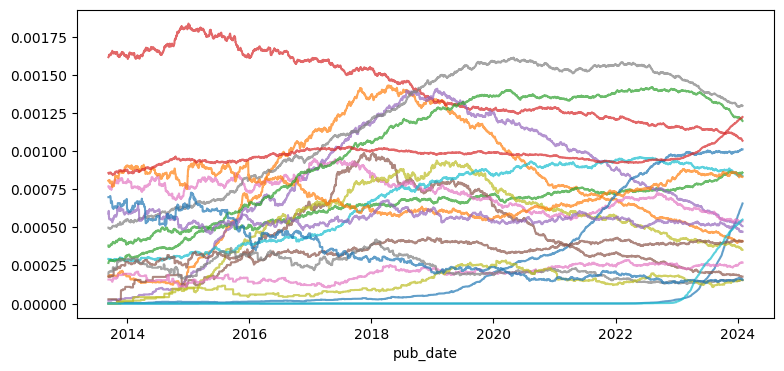

In [33]:
plt.figure(figsize=(9,4))
token_list = ['llm', 'recurrent', 'optimize', 'optimal', 'cnn', 'rnn', 'neighbor',
             'architecture', 'lstm', 'transfer', 'transformer', 'quantum', 'learn', #'language',
             'large', 'cpu', 'gpu', 'nvidia', 'intel', 'cryptocurrency','chatgpt', 'turing']
for i in token_list:
    sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean() / date_df[i].max(), alpha=0.7)
#plt.title('Use of the word "neural"')
#plt.axhline(3, ls='--')
#plt.legend(token_list)

<Axes: xlabel='number_of_papers', ylabel='number_of_tokens'>

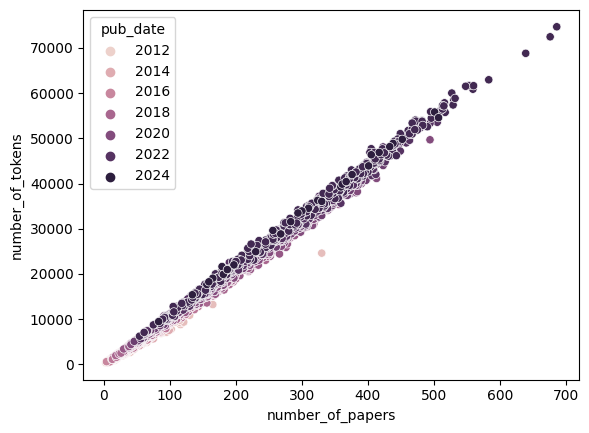

In [34]:
sns.scatterplot(x=date_df['number_of_papers'], y=date_df['number_of_tokens'],hue=pd.to_datetime(date_df['pub_date']).dt.year)

<Axes: ylabel='pub_date'>

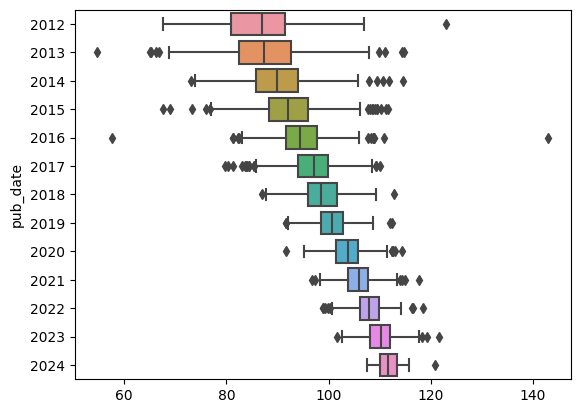

In [35]:
sns.boxplot(x=date_df['number_of_tokens'] / date_df['number_of_papers'],y=(pd.to_datetime(date_df['pub_date']).dt.year).astype('category'))


StopIteration: 

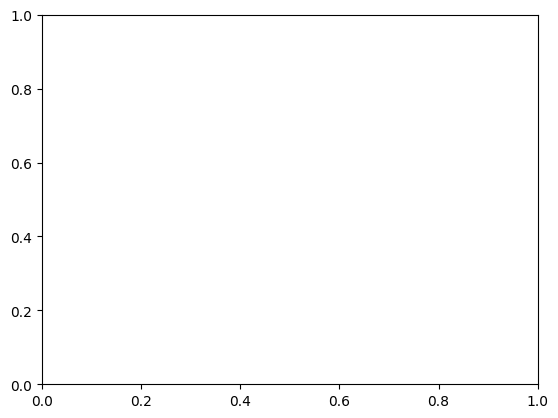

In [36]:
sns.histplot(date_df['number_of_tokens'] / date_df['number_of_papers'])

In [37]:
def common_token_counter(clean_string):
    return [j for j,k in Counter(clean_string.split()).most_common(10)]

In [38]:
top_tokens_list = Counter(" ".join([i for i in date_df['cleaned_text'].apply(common_token_counter).str.join(sep=' ')]).split())

print(f"Number of total tokens: {len(top_tokens_list)}")

Number of total tokens: 653


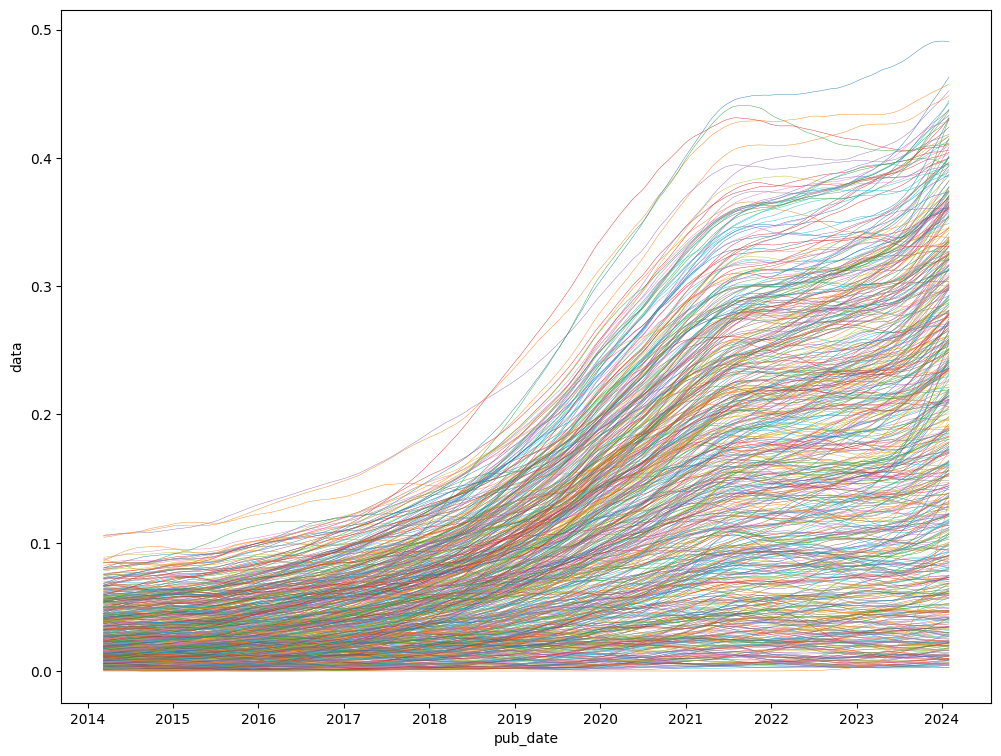

In [39]:
plt.figure(figsize=(12,9))
token_list = top_tokens_list

for i in token_list:
    try:
#        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.3)
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df[i].max()).rolling(360).mean().rolling(180).mean(), linewidth=0.3)
    except:
        pass
#plt.title('Use of the word "neural"')
#plt.xlim(2016,2024)

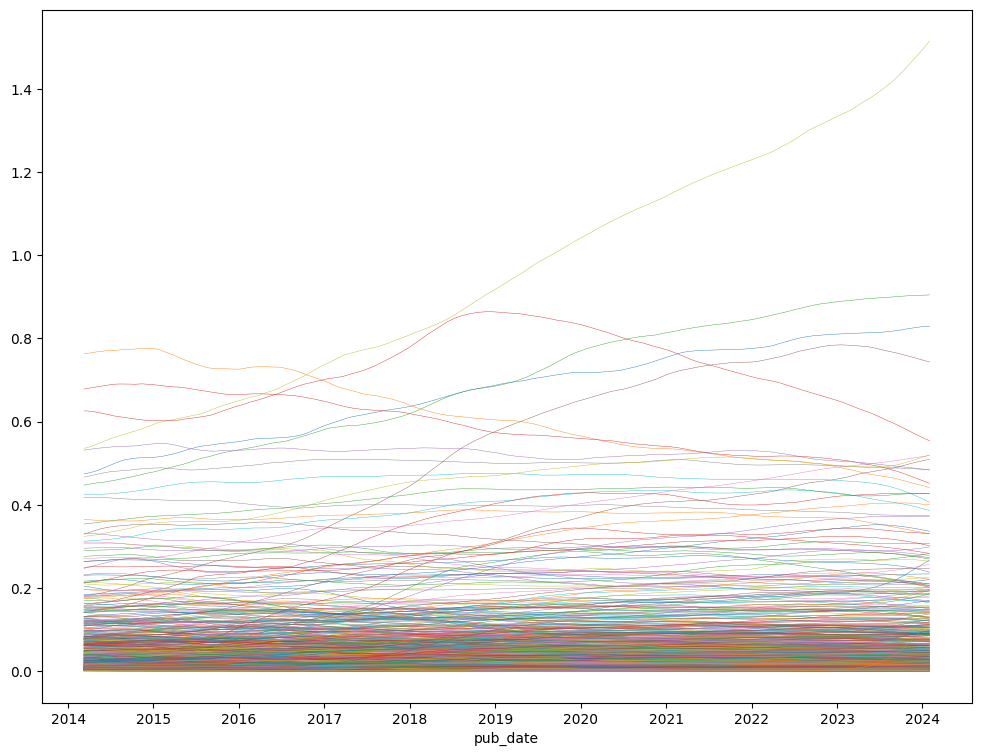

In [40]:
plt.figure(figsize=(12,9))
token_list = top_tokens_list

for i in token_list:
    try:
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean().rolling(180).mean(), linewidth=0.3)
    except:
        pass
#plt.title('Use of the word "neural"')
#plt.xlim(2016,2024)

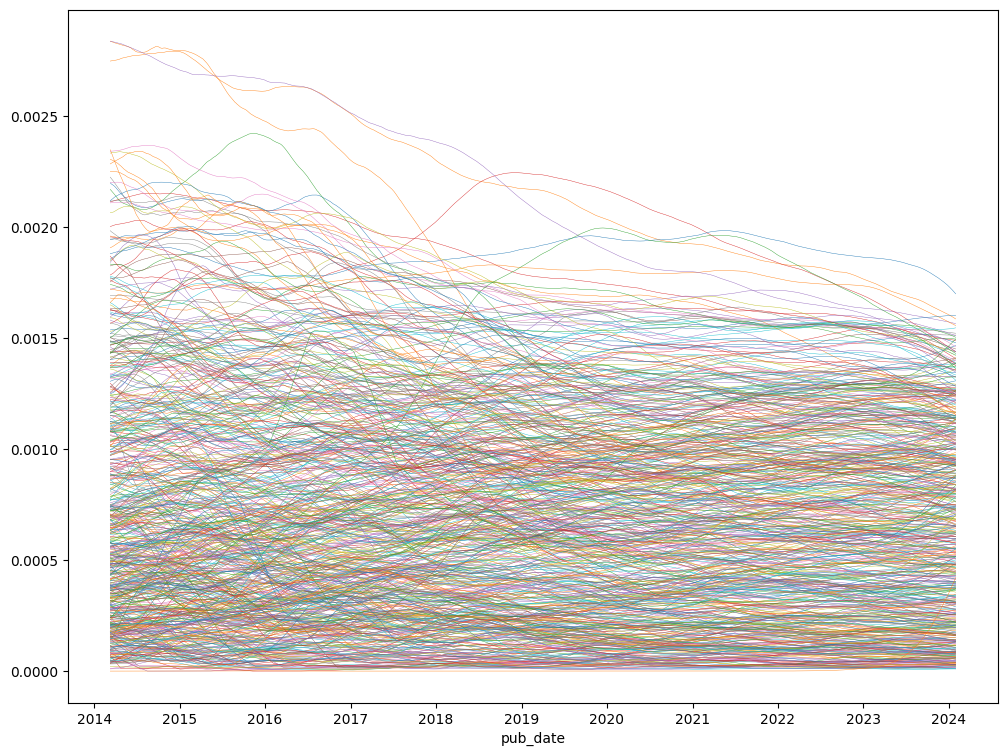

In [41]:
plt.figure(figsize=(12,9))
token_list = top_tokens_list

for i in token_list:
    try:
#        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.3)
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean().rolling(180).mean() / date_df[i].max(), linewidth=0.3,)
    except:
        pass

<Axes: xlabel='pub_date'>

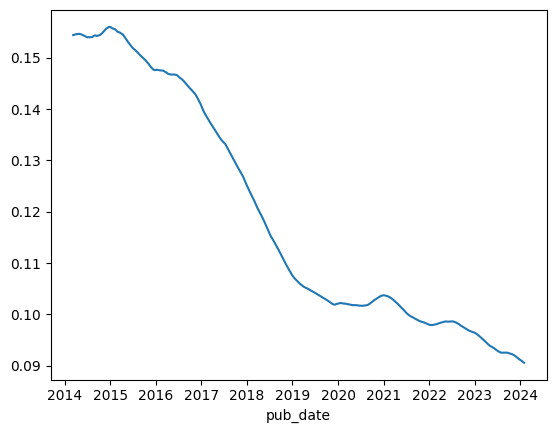

In [42]:
sns.lineplot(x=date_df['pub_date'],y=(date_df['linear'] / date_df['number_of_papers']).rolling(360).mean().rolling(180).mean())


In [44]:
#dataset for simple nnet trial
nn_df = date_df.drop(columns=['cleaned_text','number_of_papers','number_of_tokens','unique_tokens'])

In [45]:
nn_df

,pub_date,000,0001,001,002,005,01,012,015,01n,...,zeta,zf,zhang,zhou,zigzag,zone,zoo,zoom,zooming,zsl
0,2012-09-12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-09-13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-09-14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-09-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-09-16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,2024-01-27,0,5,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4108,2024-01-28,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
4109,2024-01-29,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4110,2024-01-30,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,8,0,0,0,2


5/5 [==============================] - 0s 2ms/step
LSTM Train RMSE: 0.28640263560446483
LSTM Test RMSE: 0.29124045805766274
GRU Train RMSE: 0.28489854914357365
GRU Test RMSE: 0.2958640725677401
Simple RNN Train RMSE: 0.28952540261138376
Simple RNN Test RMSE: 0.2940840326799966
MLP Train RMSE: 0.2781997550039466
MLP Test RMSE: 0.30924680023572093


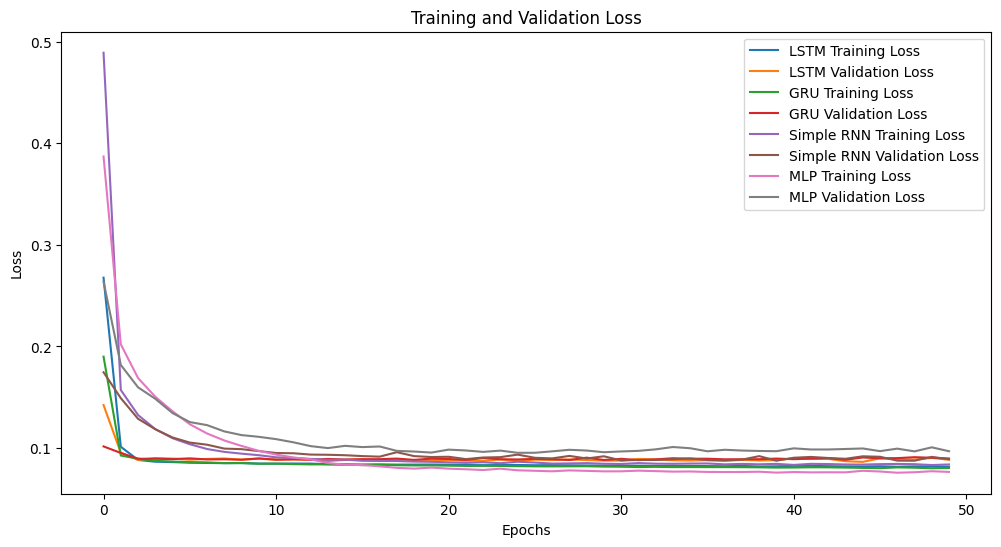

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

# Normalize the data
scaler = MinMaxScaler()
nn_df_scaled = pd.DataFrame(scaler.fit_transform(nn_df), index=nn_df.index, columns=nn_df.columns)

# Prepare data for LSTM, GRU, and Simple RNN
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), :])
        y.append(data[i + look_back, :])
    return np.array(X), np.array(y)

look_back = 7  # Use past 7 days to predict the next day
X_lstm, y_lstm = create_dataset(nn_df_scaled.values, look_back)
X_gru, y_gru = create_dataset(nn_df_scaled.values, look_back)

# Split the data into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)
X_train_gru, X_test_gru, y_train_gru, y_test_gru = train_test_split(X_gru, y_gru, test_size=0.2, shuffle=False)

# Define and train LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, nn_df_scaled.shape[1])))
lstm_model.add(Dense(nn_df_scaled.shape[1]))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Define and train GRU model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(look_back, nn_df_scaled.shape[1])))
gru_model.add(Dense(nn_df_scaled.shape[1]))
gru_model.compile(optimizer='adam', loss='mse')
gru_history = gru_model.fit(X_train_gru, y_train_gru, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Define and train Simple RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(look_back, nn_df_scaled.shape[1])))
rnn_model.add(Dense(nn_df_scaled.shape[1]))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_history = rnn_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Prepare data for MLP
X_train_mlp = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1] * X_train_lstm.shape[2]))
X_test_mlp = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1] * X_test_lstm.shape[2]))

# Define and train MLP model
mlp_model = Sequential()
mlp_model.add(Dense(100, input_shape=(X_train_mlp.shape[1],)))
mlp_model.add(Dense(nn_df_scaled.shape[1]))
mlp_model.compile(optimizer='adam', loss='mse')
mlp_history = mlp_model.fit(X_train_mlp, y_train_lstm, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Evaluate models and calculate RMSE
def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    return train_rmse, test_rmse

# Evaluate models
lstm_train_rmse, lstm_test_rmse = evaluate_model(lstm_model, X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm)
gru_train_rmse, gru_test_rmse = evaluate_model(gru_model, X_train_gru, X_test_gru, y_train_gru, y_test_gru)
rnn_train_rmse, rnn_test_rmse = evaluate_model(rnn_model, X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm)
mlp_train_rmse, mlp_test_rmse = evaluate_model(mlp_model, X_train_mlp, X_test_mlp, y_train_lstm, y_test_lstm)

# Print RMSE for each model
print("LSTM Train RMSE:", lstm_train_rmse)
print("LSTM Test RMSE:", lstm_test_rmse)
print("GRU Train RMSE:", gru_train_rmse)
print("GRU Test RMSE:", gru_test_rmse)
print("Simple RNN Train RMSE:", rnn_train_rmse)
print("Simple RNN Test RMSE:", rnn_test_rmse)
print("MLP Train RMSE:", mlp_train_rmse)
print("MLP Test RMSE:", mlp_test_rmse)

# Plot training and validation loss for all models
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.plot(rnn_history.history['loss'], label='Simple RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Simple RNN Validation Loss')
plt.plot(mlp_history.history['loss'], label='MLP Training Loss')
plt.plot(mlp_history.history['val_loss'], label='MLP Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


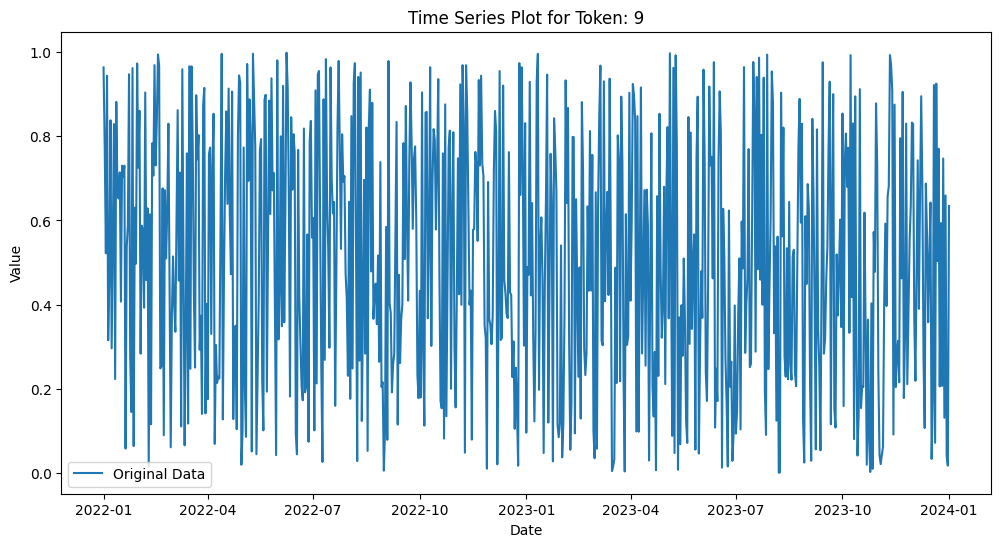

5/5 [==============================] - 0s 1ms/step


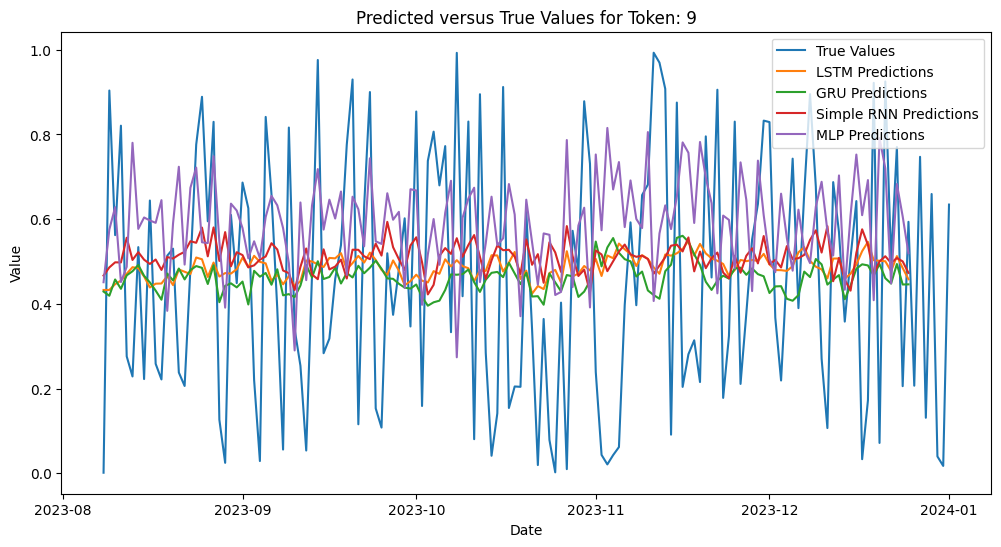

In [67]:
# Step 1: Select a random column from the dataframe
random_column = random.choice(nn_df.columns)
token_name = random_column.split('_')[-1]  # Extract the token name

# Step 2: Plot the time series data for the selected column
plt.figure(figsize=(12, 6))
plt.plot(nn_df.index, nn_df[random_column], label='Original Data')
plt.title(f'Time Series Plot for Token: {token_name}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Step 3: Split the data into training and testing sets
split_index = int(len(nn_df) * 0.8)
train_data = nn_df[random_column][:split_index]
test_data = nn_df[random_column][split_index:]

# Step 4-6: Train each model and make predictions
# Define the look back period
look_back = 7

# Prepare the data for LSTM and GRU
X_train, y_train = create_dataset(nn_df_scaled.values[:split_index], look_back)
X_test, y_test = create_dataset(nn_df_scaled.values[split_index:], look_back)

# Reshape data for MLP
X_train_mlp = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_mlp = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

# Train LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, nn_df_scaled.shape[1])))
lstm_model.add(Dense(nn_df_scaled.shape[1]))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Train GRU model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(look_back, nn_df_scaled.shape[1])))
gru_model.add(Dense(nn_df_scaled.shape[1]))
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Train Simple RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(look_back, nn_df_scaled.shape[1])))
rnn_model.add(Dense(nn_df_scaled.shape[1]))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Train MLP model
mlp_model = Sequential()
mlp_model.add(Dense(100, input_shape=(look_back * nn_df_scaled.shape[1],)))
mlp_model.add(Dense(nn_df_scaled.shape[1]))
mlp_model.compile(optimizer='adam', loss='mse')
mlp_model.fit(X_train_mlp, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)
rnn_predictions = rnn_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test_mlp)

# Plot predicted versus true values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='True Values')
plt.plot(test_data.index[:len(lstm_predictions)], scaler.inverse_transform(lstm_predictions)[:,0], label='LSTM Predictions')
plt.plot(test_data.index[:len(gru_predictions)], scaler.inverse_transform(gru_predictions)[:,0], label='GRU Predictions')
plt.plot(test_data.index[:len(rnn_predictions)], scaler.inverse_transform(rnn_predictions)[:,0], label='Simple RNN Predictions')
plt.plot(test_data.index[:len(mlp_predictions)], scaler.inverse_transform(mlp_predictions)[:,0], label='MLP Predictions')
plt.title(f'Predicted versus True Values for Token: {token_name}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

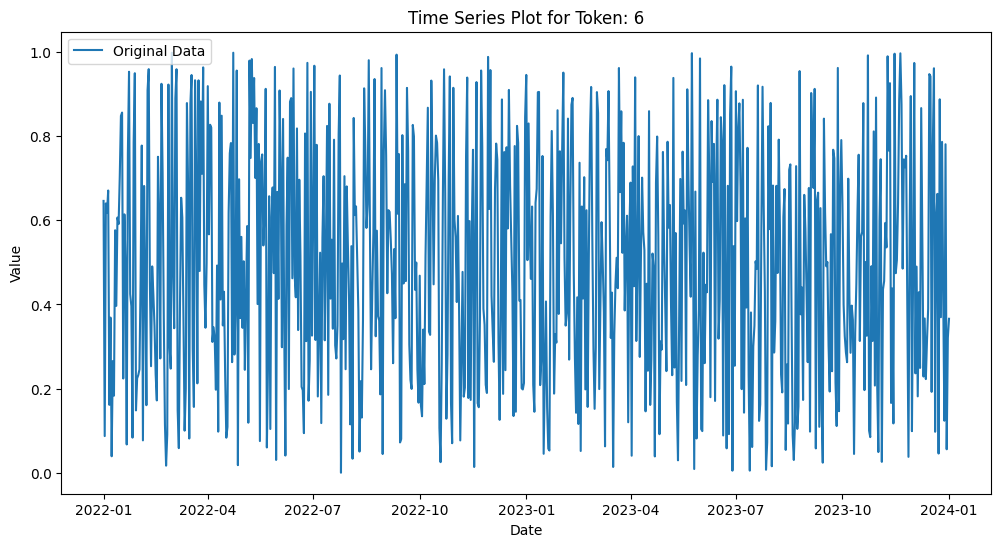

5/5 [==============================] - 0s 1ms/step


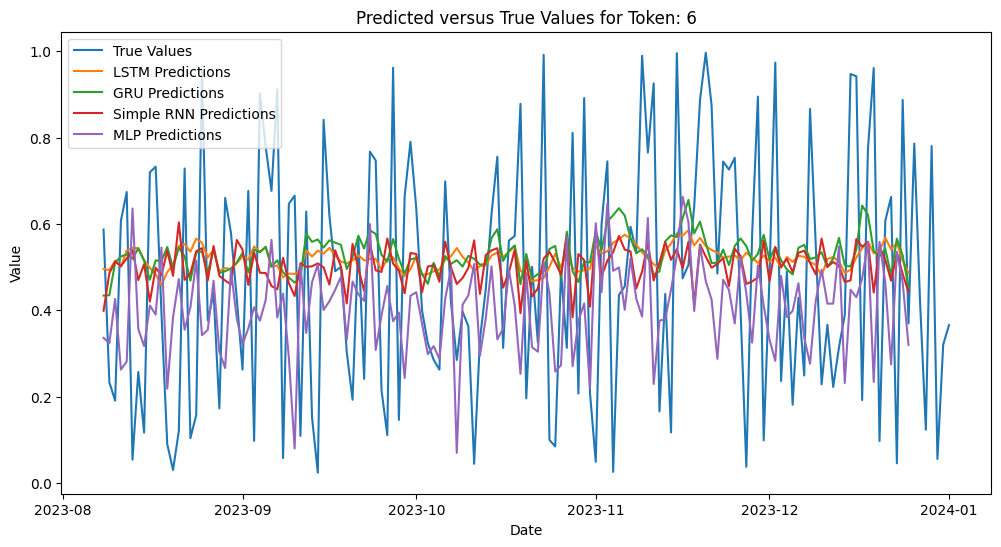

In [71]:
# Step 1: Select a random column from the dataframe
random_column = random.choice(nn_df.columns)
token_name = random_column.split('_')[-1]  # Extract the token name

# Step 2: Plot the time series data for the selected column
plt.figure(figsize=(12, 6))
plt.plot(nn_df.index, nn_df[random_column], label='Original Data')
plt.title(f'Time Series Plot for Token: {token_name}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Step 3: Split the data into training and testing sets
split_index = int(len(nn_df) * 0.8)
train_data = nn_df[random_column][:split_index]
test_data = nn_df[random_column][split_index:]

# Step 4-6: Train each model and make predictions
# Define the look back period
look_back = 7

# Prepare the data for LSTM and GRU
X_train, y_train = create_dataset(nn_df.values[:split_index], look_back)
X_test, y_test = create_dataset(nn_df.values[split_index:], look_back)

# Reshape data for MLP
X_train_mlp = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_mlp = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

# Train LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, nn_df.shape[1])))
lstm_model.add(Dense(nn_df.shape[1]))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Train GRU model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(look_back, nn_df.shape[1])))
gru_model.add(Dense(nn_df.shape[1]))
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Train Simple RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(look_back, nn_df.shape[1])))
rnn_model.add(Dense(nn_df.shape[1]))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Train MLP model
mlp_model = Sequential()
mlp_model.add(Dense(100, input_shape=(look_back * nn_df.shape[1],)))
mlp_model.add(Dense(nn_df.shape[1]))
mlp_model.compile(optimizer='adam', loss='mse')
mlp_model.fit(X_train_mlp, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)
rnn_predictions = rnn_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test_mlp)

# Plot predicted versus true values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='True Values')
plt.plot(test_data.index[:len(lstm_predictions)], lstm_predictions[:,0], label='LSTM Predictions')
plt.plot(test_data.index[:len(gru_predictions)], gru_predictions[:,0], label='GRU Predictions')
plt.plot(test_data.index[:len(rnn_predictions)], rnn_predictions[:,0], label='Simple RNN Predictions')
plt.plot(test_data.index[:len(mlp_predictions)], mlp_predictions[:,0], label='MLP Predictions')
plt.title(f'Predicted versus True Values for Token: {token_name}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Function to plot prediction vs. ground truth comparison
def plot_prediction_vs_ground_truth(y_true, y_pred, title=''):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Ground Truth', color='blue')
    plt.plot(y_pred, label='Predicted', color='red')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Function to plot residuals
def plot_residuals(y_true, y_pred, title=''):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(title)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

# Function to plot error distribution
def plot_error_distribution(y_true, y_pred, title=''):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='skyblue')
    plt.title(title)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot time series with predictions
def plot_time_series_with_predictions(y_true, y_pred, title=''):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='True Values', color='blue')
    plt.plot(y_pred, label='Predictions', color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Function to plot feature importance
def plot_feature_importance(importance, feature_names, title=''):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=feature_names)
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Function to plot learning curve
def plot_learning_curve(train_errors, test_errors, title=''):
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Training Error', color='blue')
    plt.plot(test_errors, label='Testing Error', color='red')
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

# Function to plot model comparison
def plot_model_comparison(model_names, train_rmse, test_rmse, title=''):
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, train_rmse, label='Train RMSE', color='skyblue')
    plt.bar(model_names, test_rmse, label='Test RMSE', color='salmon', alpha=0.5)
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

# Function to plot confidence intervals
def plot_confidence_intervals(predictions, confidence_intervals, title=''):
    plt.figure(figsize=(10, 6))
    plt.plot(predictions, label='Predicted Values', color='blue')
    plt.fill_between(range(len(predictions)), confidence_intervals[:, 0], confidence_intervals[:, 1], color='red', alpha=0.3)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Function to plot residual autocorrelation
def plot_residual_autocorrelation(residuals, title=''):
    plt.figure(figsize=(10, 6))
    plt.acorr(residuals, maxlags=len(residuals)-1)
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

    
# Train and evaluate LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, nn_df_scaled.shape[1])))
lstm_model.add(Dense(nn_df_scaled.shape[1]))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
lstm_train_pred = lstm_model.predict(X_train_lstm)
lstm_test_pred = lstm_model.predict(X_test_lstm)
lstm_train_rmse = np.sqrt(mean_squared_error(y_train_lstm, lstm_train_pred))
lstm_test_rmse = np.sqrt(mean_squared_error(y_test_lstm, lstm_test_pred))

# Train and evaluate GRU model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(look_back, nn_df_scaled.shape[1])))
gru_model.add(Dense(nn_df_scaled.shape[1]))
gru_model.compile(optimizer='adam', loss='mse')
gru_history = gru_model.fit(X_train_gru, y_train_gru, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
gru_train_pred = gru_model.predict(X_train_gru)
gru_test_pred = gru_model.predict(X_test_gru)
gru_train_rmse = np.sqrt(mean_squared_error(y_train_gru, gru_train_pred))
gru_test_rmse = np.sqrt(mean_squared_error(y_test_gru, gru_test_pred))

# Train and evaluate Simple RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(look_back, nn_df_scaled.shape[1])))
rnn_model.add(Dense(nn_df_scaled.shape[1]))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_history = rnn_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
rnn_train_pred = rnn_model.predict(X_train_lstm)
rnn_test_pred = rnn_model.predict(X_test_lstm)
rnn_train_rmse = np.sqrt(mean_squared_error(y_train_lstm, rnn_train_pred))
rnn_test_rmse = np.sqrt(mean_squared_error(y_test_lstm, rnn_test_pred))

# Reshape data for MLP
X_train_mlp = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1] * X_train_lstm.shape[2]))
X_test_mlp = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1] * X_test_lstm.shape[2]))

# Train MLP model
mlp_model = Sequential()
mlp_model.add(Dense(100, input_shape=(X_train_mlp.shape[1],)))  # Input shape adjusted
mlp_model.add(Dense(nn_df_scaled.shape[1]))
mlp_model.compile(optimizer='adam', loss='mse')
mlp_history = mlp_model.fit(X_train_mlp, y_train_lstm, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
mlp_train_pred = mlp_model.predict(X_train_mlp)
mlp_test_pred = mlp_model.predict(X_test_mlp)
mlp_train_rmse = np.sqrt(mean_squared_error(y_train_lstm, mlp_train_pred))
mlp_test_rmse = np.sqrt(mean_squared_error(y_test_lstm, mlp_test_pred))

# Plot training and validation loss for all models
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.plot(rnn_history.history['loss'], label='Simple RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Simple RNN Validation Loss')
plt.plot(mlp_history.history['loss'], label='MLP Training Loss')
plt.plot(mlp_history.history['val_loss'], label='MLP Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot prediction vs. ground truth comparison for all models
plot_prediction_vs_ground_truth(y_train_lstm, lstm_train_pred, title='LSTM Train Predictions vs. Ground Truth')
plot_prediction_vs_ground_truth(y_test_lstm, lstm_test_pred, title='LSTM Test Predictions vs. Ground Truth')
# plot_prediction_vs_ground_truth(y_train_gru, gru_train_pred, title='GRU Train Predictions vs. Ground Truth')
# plot_prediction_vs_ground_truth(y_test_gru, gru_test_pred, title='GRU Test Predictions vs. Ground Truth')
# plot_prediction_vs_ground_truth(y_train_lstm, rnn_train_pred, title='Simple RNN Train Predictions vs. Ground Truth')
# plot_prediction_vs_ground_truth(y_test_lstm, rnn_test_pred, title='Simple RNN Test Predictions vs. Ground Truth')
# plot_prediction_vs_ground_truth(y_train_lstm, mlp_train_pred, title='MLP Train Predictions vs. Ground Truth')
# plot_prediction_vs_ground_truth(y_test_lstm, mlp_test_pred, title='MLP Test Predictions vs. Ground Truth')

# Plot residuals for all models
plot_residuals(y_train_lstm, lstm_train_pred, title='LSTM Train Residuals')
plot_residuals(y_test_lstm, lstm_test_pred, title='LSTM Test Residuals')
plot_residuals(y_train_gru, gru_train_pred, title='GRU Train Residuals')
plot_residuals(y_test_gru, gru_test_pred, title='GRU Test Residuals')
plot_residuals(y_train_lstm, rnn_train_pred, title='Simple RNN Train Residuals')
plot_residuals(y_test_lstm, rnn_test_pred, title='Simple RNN Test Residuals')
plot_residuals(y_train_lstm, mlp_train_pred, title='MLP Train Residuals')
plot_residuals(y_test_lstm, mlp_test_pred, title='MLP Test Residuals')

# Plot error distribution for all models
plot_error_distribution(y_train_lstm, lstm_train_pred, title='LSTM Train Error Distribution')
plot_error_distribution(y_test_lstm, lstm_test_pred, title='LSTM Test Error Distribution')
plot_error_distribution(y_train_gru, gru_train_pred, title='GRU Train Error Distribution')
plot_error_distribution(y_test_gru, gru_test_pred, title='GRU Test Error Distribution')
plot_error_distribution(y_train_lstm, rnn_train_pred, title='Simple RNN Train Error Distribution')
plot_error_distribution(y_test_lstm, rnn_test_pred, title='Simple RNN Test Error Distribution')
plot_error_distribution(y_train_lstm, mlp_train_pred, title='MLP Train Error Distribution')
plot_error_distribution(y_test_lstm, mlp_test_pred, title='MLP Test Error Distribution')

# Plot time series with predictions for all models
plot_time_series_with_predictions(y_test_lstm[:50], lstm_test_pred[:50], title='LSTM Test Predictions')
plot_time_series_with_predictions(y_test_gru[:50], gru_test_pred[:50], title='GRU Test Predictions')
plot_time_series_with_predictions(y_test_lstm[:50], rnn_test_pred[:50], title='Simple RNN Test Predictions')
plot_time_series_with_predictions(y_test_lstm[:50], mlp_test_pred[:50], title='MLP Test Predictions')


5/5 [==============================] - 0s 2ms/step
